In [6]:
#RESTURANT_ANALYTICS_PROJECT

#This project focuses on performing data analysis on a restaurant dataset
#to identify performance drivers, customer preferences, and market trends.
#The objective is to derive actionable insights to support data-driven decision-making.

#I have divided this particular analysis in 4-modules covering:-
#1)Restaurant Perforamnce Segmentation.
#2)Customer Prefrence Patterns.
#3)Geogrpahic & Market Analysis.
#4)Business-Level Aggregation.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Project/Dataset .csv')

df.head()
df.shape
df.columns
df.info()

#The dataset was reviewed for structure and completeness. Preprocessed data from
#previous analysis stages was reused for consistency.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [8]:
df.isnull().sum()



,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
(df['Aggregate rating'] == 0).sum()


np.int64(2148)

In [12]:
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
df = df[df['Aggregate rating'] > 0]



In [13]:
df.isnull().sum()
df.duplicated().sum()
(df['Aggregate rating'] == 0).sum()
df.shape

### Data Validation & Preparation
#The dataset was reviewed for missing values, duplicate records, and invalid ratings.
#A small number of missing cuisine entries were handled, and restaurants without
#ratings were excluded to ensure meaningful analytical insights.


(7403, 21)

In [14]:
#Let's begin with
#1st Module:-Restaurant Performance Segmentation
#This Module will cover:-a)Rating Segments and b)Votes Comparison

#a)Created Rating Segments
def rating_segment(r):
    if r >= 4:
        return 'High Rated'
    elif r >= 3:
        return 'Mid Rated'
    else:
        return 'Low Rated'

df['Rating Segment'] = df['Aggregate rating'].apply(rating_segment)
df['Rating Segment'].value_counts()


,count
Rating Segment,
Mid Rated,4590
Low Rated,1433
High Rated,1380


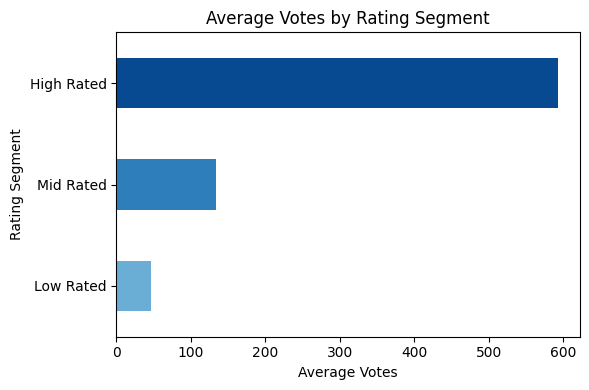

In [18]:
#b)Votes Comaprison by Segment
plt.figure(figsize=(6,4))
segment_votes.sort_values().plot(
    kind='barh',
    color=plt.cm.Blues([0.5, 0.7, 0.9])
)
plt.title('Average Votes by Rating Segment')
plt.xlabel('Average Votes')
plt.ylabel('Rating Segment')
plt.tight_layout()
plt.show()


### Key Insights
#- High-rated restaurants receive significantly higher customer engagement.
#- Low-rated restaurants show lower average votes, indicating limited popularity.


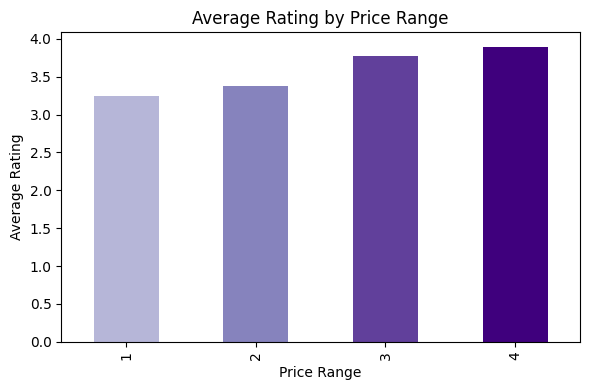

In [23]:
#MODULE 2: Customer Preference Patterns
#This Module will cover:-a)Price range V/S Average rating and b)Online Delivery

 #a)Price range V/S Average rating
price_rating = df.groupby('Price range')['Aggregate rating'].mean()

plt.figure(figsize=(6,4))
price_rating.plot(
    kind='bar',
    color=plt.cm.Purples([0.4, 0.6, 0.8, 1.0])
)
plt.title('Average Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()



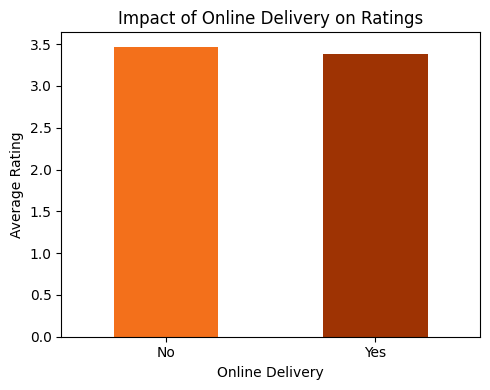

In [29]:
#b)Online Delivery Imapct
delivery_effect = df.groupby('Has Online delivery')['Aggregate rating'].mean()

plt.figure(figsize=(5,4))
delivery_effect.plot(
    kind='bar',
    color=plt.cm.Oranges([0.6, 0.9])
)
plt.title('Impact of Online Delivery on Ratings')
plt.xlabel('Online Delivery')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Key Insights
##- Mid-range restaurants tend to balance quality and affordability effectively.
##- Restaurants offering online delivery show higher average ratings.


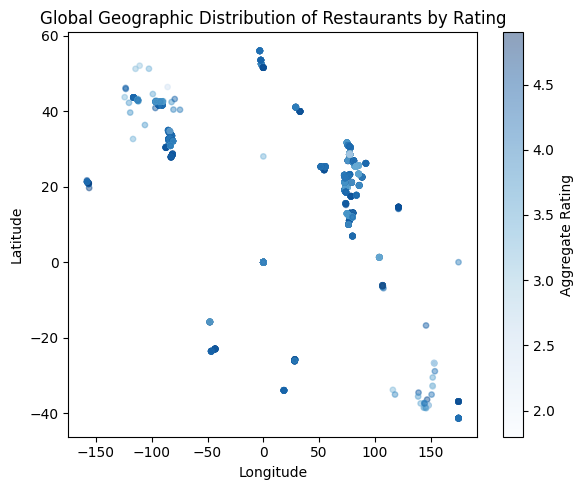

In [33]:
#MODULE 3: Geographic & Market Analysis
#This Module will cover:-a)Rating Density

#a)Rating Density(World Prespective)
plt.figure(figsize=(6,5))

plt.scatter(
    df['Longitude'],
    df['Latitude'],
    c=df['Aggregate rating'],
    cmap='Blues',
    alpha=0.45,
    s=15
)

plt.colorbar(label='Aggregate Rating')
plt.title('Global Geographic Distribution of Restaurants by Rating')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()

### Key Insights
##- Restaurants are concentrated in urban and high-activity regions.
##- Certain geographic clusters show consistently higher ratings.



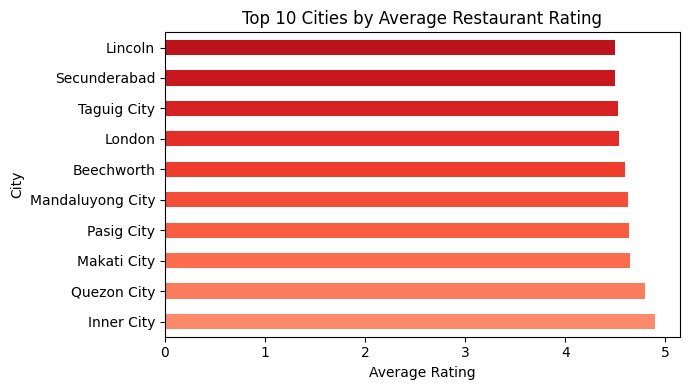

In [35]:
#MODULE 4: Business-Level Aggregation
#a)Top Cities by Average Rating

top_cities = (
    df.groupby('City')['Aggregate rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(7,4))
top_cities.plot(
    kind='barh',
    color=plt.cm.Reds(np.linspace(0.4, 0.8, len(top_cities)))
)
plt.title('Top 10 Cities by Average Restaurant Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.tight_layout()
plt.show()

## Business Recommendations
##- Focus on maintaining mid-range pricing to attract higher customer engagement.
##- Offering online delivery can significantly improve restaurant visibility and ratings.
##- High-performing cuisine combinations and urban locations should be prioritized for expansion.


In [ ]:
## Conclusion:-
# This project demonstrates an end-to-end analytical workflow, combining data
# segmentation, customer behavior analysis, geographic insights, and business recommendations.